In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

In [ ]:
!pip install keras-preprocessing

##Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

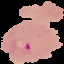

In [ ]:
load_img("/content/drive/MyDrive/Malrial Cell dataset/Malarial Cell Image Data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png",target_size=(64,64))

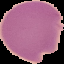

In [ ]:
load_img("/content/drive/MyDrive/Malrial Cell dataset/Malarial Cell Image Data/cell_images/Uninfected/C102P63ThinF_IMG_20150918_161826_cell_19.png",target_size=(64,64))

In [ ]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [ ]:
image_dir="/content/drive/MyDrive/Malrial Cell dataset/Malarial Cell Image Data/cell_images"
size=64
dataset=[]
label=[]

In [ ]:
parasitized_img=os.listdir(image_dir+"/Parasitized")
parasitized_img=parasitized_img[:3000]
for i, img_name in enumerate(tqdm(parasitized_img)):
    if(img_name.split('.')[1]=='png'):
       image=cv2.imread(image_dir+"/Parasitized/"+img_name)
       image=Image.fromarray(image,'RGB')
       image=image.resize((size,size))
       dataset.append(np.array(image))
       label.append(0)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
len(parasitized_img)


3000

In [ ]:
Uninfected_img=os.listdir(image_dir+"/Uninfected")
Uninfected_img=Uninfected_img[:3000]
for i, img_name in enumerate(tqdm(Uninfected_img)):
    if(img_name.split('.')[1]=='png'):
       image=cv2.imread(image_dir+"/Uninfected/"+img_name)
       image=Image.fromarray(image,'RGB')
       image=image.resize((size,size))
       dataset.append(np.array(image))
       label.append(1)

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
len(parasitized_img)

3000

In [ ]:
"C91P52ThinF_IMG_20150821_124937_cell_218.png".split('.')[1]

'png'

In [ ]:
a=cv2.imread("/content/drive/MyDrive/Malrial Cell dataset/Malarial Cell Image Data/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
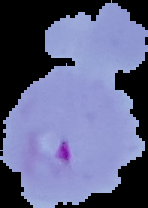

In [ ]:
a

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)

##CNN Model Architecture

In [ ]:
INPUT_SHAPE=(size,size,3)
inp = k.Input(shape=INPUT_SHAPE)
conv1 = k.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same')(inp)
pool1 = k.MaxPool2D(pool_size=(2, 2))(conv1)
norm1 = k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2 = k.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same')(drop1)
pool2 = k.MaxPool2D(pool_size=(2, 2))(conv2)
norm2 = k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation='relu')(flat)
norm3 = k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation='relu')(drop3)
norm4 = k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation='sigmoid')(drop4)

In [ ]:
model=keras.Model(inputs=inp,outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248

In [ ]:
history=model.fit(np.array(xtrain), ytrain, epochs=5, batch_size=64, verbose=1, validation_split=0.1, shuffle=False)

Epoch 1/5
68/68 [==============================] - 59s 772ms/step - loss: 0.1217 - accuracy: 0.9530 - val_loss: 1.3696 - val_accuracy: 0.7604
Epoch 2/5
68/68 [==============================] - 54s 797ms/step - loss: 0.0787 - accuracy: 0.9671 - val_loss: 1.2299 - val_accuracy: 0.7875
Epoch 3/5
68/68 [==============================] - 50s 734ms/step - loss: 0.0693 - accuracy: 0.9761 - val_loss: 1.4426 - val_accuracy: 0.7104
Epoch 4/5
68/68 [==============================] - 54s 800ms/step - loss: 0.0525 - accuracy: 0.9819 - val_loss: 0.3894 - val_accuracy: 0.8896
Epoch 5/5
68/68 [==============================] - 53s 785ms/step - loss: 0.0582 - accuracy: 0.9810 - val_loss: 0.4573 - val_accuracy: 0.9021


In [ ]:
print("Test_accuracy: {:.2f}%".format(model.evaluate(np.array(xtest), np.array(ytest))[1]*100))

38/38 [==============================] - 3s 90ms/step - loss: 0.4802 - accuracy: 0.9175
Test_accuracy: 91.75%


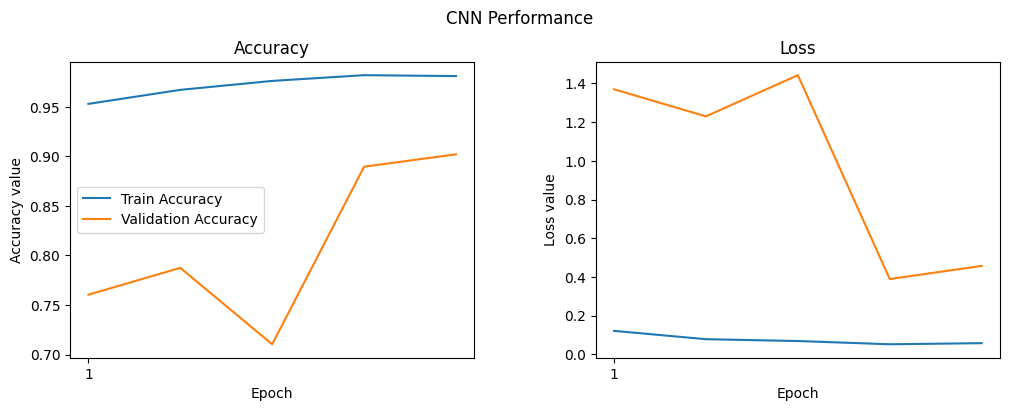

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1, max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1=ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2=ax1.legend(loc="best")